# **Histograms**

* A histogram is a visual representation of the distribution of a continuous feature.
* For images, we can display the frequency of values for colours
Each of the 3 RGB channels have values between 0-255.
* We can plot these three histograms on top of each other to see how much of each channel there is.
* Peaks of histograms can be joined together to form a curve.

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
horse_bgr=cv2.imread('../DATA/horse.jpg') #Original BGR OpenCV
horse=cv2.cvtColor(horse_bgr, cv2.COLOR_BGR2RGB) #Converted to RGB for showing on matplotlib

rainbow_bgr=cv2.imread('../DATA/rainbow.jpg')
rainbow=cv2.cvtColor(rainbow_bgr, cv2.COLOR_BGR2RGB)

bricks_bgr=cv2.imread('../DATA/bricks.jpg')
bricks=cv2.cvtColor(bricks_bgr, cv2.COLOR_BGR2RGB)

#the bgr images will be used to perform calculations

In [61]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

Here's a visual representation of difference between RGB and BGR channels:

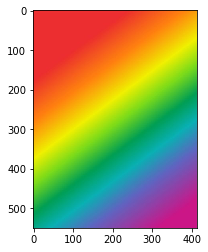

In [62]:
plt.imshow(rainbow)

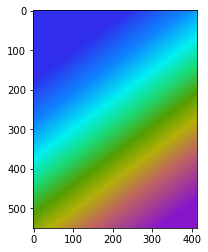

In [63]:
plt.imshow(rainbow_bgr)

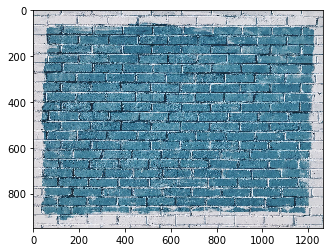

In [64]:
plt.imshow(bricks)

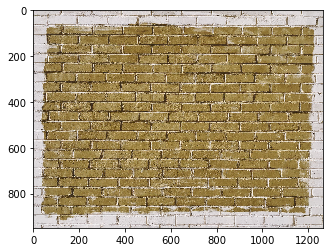

In [65]:
plt.imshow(bricks_bgr)

Calculating Histogram Values:

In [66]:
#OPENCV channel order: 0-->Blue, 1-->Green, 2-->Red
hist_values=cv2.calcHist([bricks_bgr], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
#calcHist() takes image as a parameter in list form
hist_values.shape

(256, 1)

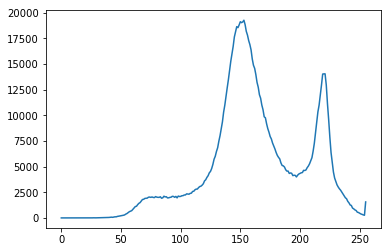

In [67]:
plt.plot(hist_values)

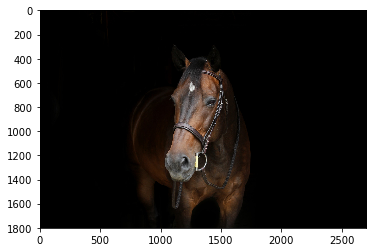

In [68]:
plt.imshow(horse)

In [69]:
#checking for horse image:
horse_hist_values=cv2.calcHist([horse_bgr], channels=[0], mask=None, histSize=[256], ranges=[0,256]) 
#calcHist() takes image as a parameter in list form
horse_hist_values.shape

(256, 1)

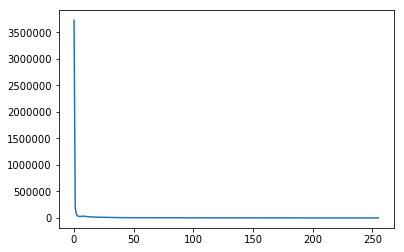

In [70]:
plt.plot(horse_hist_values)

Text(0.5,1,'HISTOGRAM FOR BRICKS IMAGE')

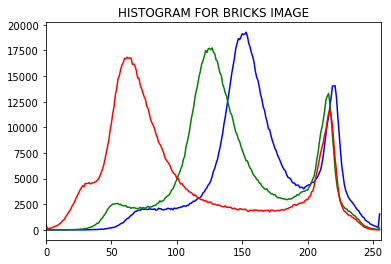

In [71]:
img=bricks_bgr
color=('b','g','r')

for i, col in enumerate(color):
    hist=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR BRICKS IMAGE')

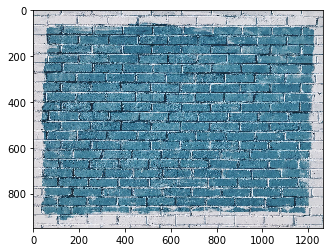

In [72]:
plt.imshow(bricks)

It is evident that contribution of Blue is much higher in this image so the histogram is pretty much accurate.
Let's now do this for the horse image.

Text(0.5,1,'HISTOGRAM FOR HORSE')

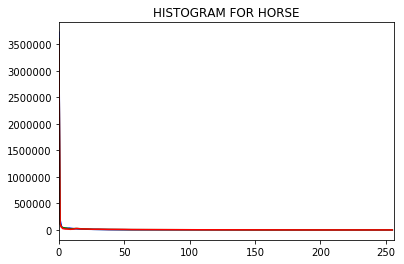

In [73]:
im=horse_bgr
color=('b','g','r')

for i, col in enumerate(color):
    hist=cv2.calcHist([im],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR HORSE')

Very little contribrution of all colours. 

# Histograms on a masked portion of the image:

It is possible to select an ROI and only calculate the color histogram of that masked section.

In [74]:
img=rainbow_bgr
img.shape

(550, 413, 3)

In [75]:
img.shape[:2] #grabbing x and y components

(550, 413)

In [76]:
mask=np.zeros(img.shape[:2], np.uint8)

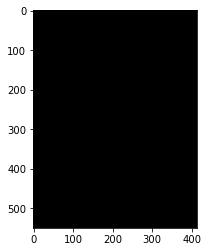

In [77]:
plt.imshow(mask,cmap='gray')

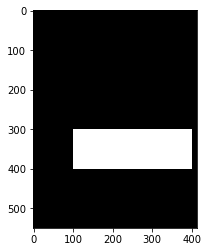

In [78]:
mask[300:400,100:400]=255 #making a white rectangle
plt.imshow(mask,cmap='gray')

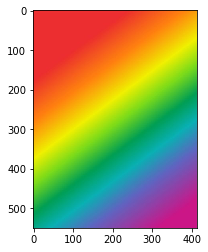

In [79]:
plt.imshow(rainbow)

In [80]:
masked_img=cv2.bitwise_and(img,img,mask=mask)

In [81]:
show_mask_img=cv2.bitwise_and(rainbow,rainbow,mask=mask)

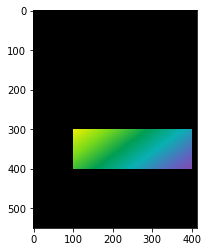

In [82]:
plt.imshow(show_mask_img)

In [83]:
hist_mask_values_red=cv2.calcHist([rainbow_bgr],channels=[2],mask=mask,histSize=[256], ranges=[0,256])

In [84]:
hist_values_red=cv2.calcHist([rainbow_bgr],channels=[2],mask=None,histSize=[256], ranges=[0,256])

Text(0.5,1,'Red Histogram for masked Rainbow')

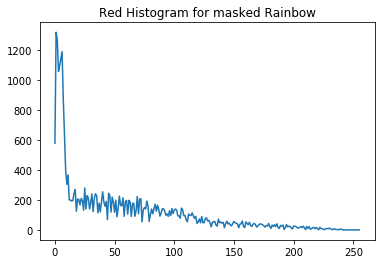

In [85]:
plt.plot(hist_mask_values_red)
plt.title('Red Histogram for masked Rainbow')

Text(0.5,1,'Red Histogram for full Rainbow image')

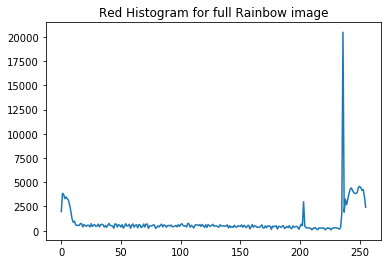

In [86]:
plt.plot(hist_values_red)
plt.title('Red Histogram for full Rainbow image')

# Histogram Equlization:

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.


Resources: https://towardsdatascience.com/histogram-equalization-5d1013626e64
https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2

When plotting a histogram of an image, you might see that the frequency distribution of colours in a channel isn't unifrom. Some colours have high frequencies while some colours aren't even there in the image. 

This is what histogram equalization tries to achieve. It tries to distribute the frequency uniformly across all colours and hence increasing contrast in most cases.

Say you have a grayscale image (single channel) with minimum colour value 55 and maximum colour value 150. After performing histogram equalization you might see the lowest value changing to 0 and highest to 255.

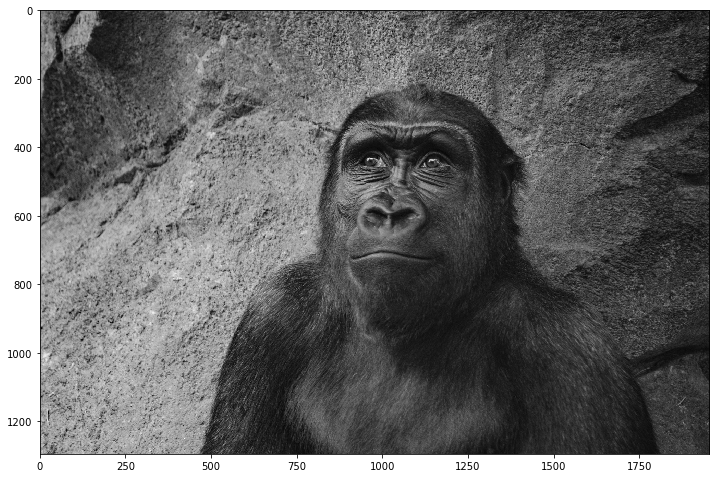

In [89]:
gorilla=cv2.imread('../DATA/gorilla.jpg',0)
display_img(gorilla)

In [90]:
gorilla.shape

(1295, 1955)

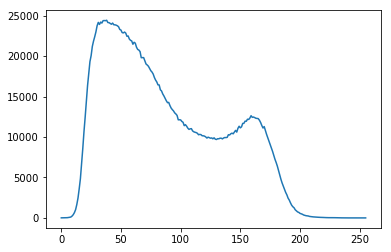

In [91]:
hist_values_gorilla=cv2.calcHist([gorilla],channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_gorilla)

Non Uniform Frequency Distribution

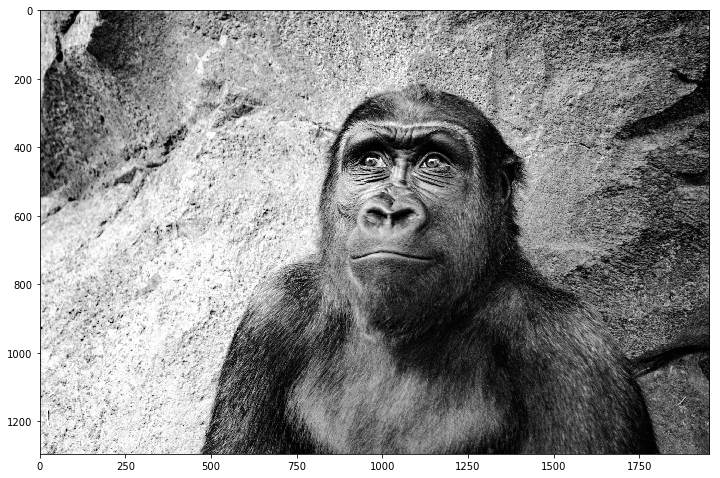

In [92]:
eq_gorilla=cv2.equalizeHist(gorilla) #equalizes image
display_img(eq_gorilla)

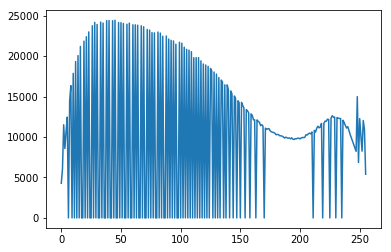

In [93]:
hist_values_eq_gorilla=cv2.calcHist([eq_gorilla],channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_eq_gorilla)

In [94]:
new_gorilla=cv2.imread('../DATA/gorilla.jpg')
color_gorilla=cv2.cvtColor(new_gorilla,cv2.COLOR_BGR2RGB)

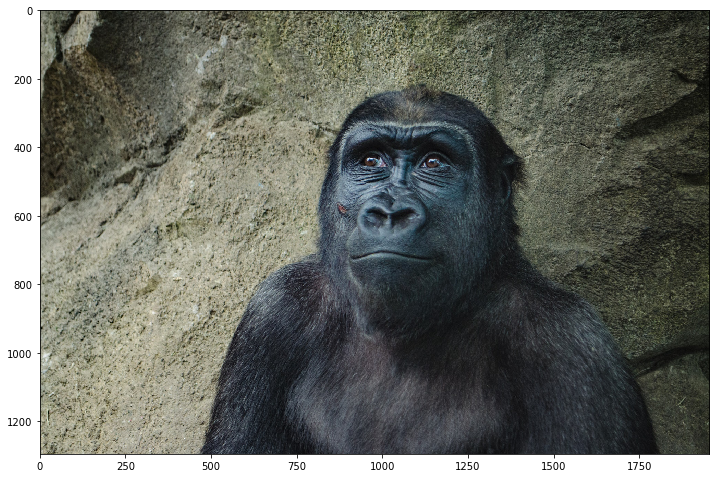

In [95]:
display_img(color_gorilla)

In [96]:
hsv_gorilla=cv2.cvtColor(new_gorilla,cv2.COLOR_BGR2HSV) #Converting original BGR image to HSV to access it's values (V of HSV)
hsv_gorilla[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [99]:
hsv_gorilla[:,:,2] = cv2.equalizeHist(hsv_gorilla[:,:,2]) #taking values of all colours, equalizing them and then assigning these new values to the originals
#this will equalize the values 

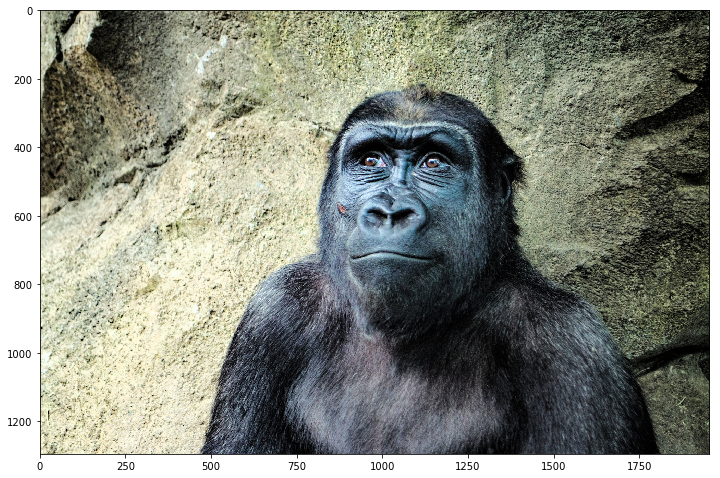

In [100]:
eq_color_gorilla=cv2.cvtColor(hsv_gorilla,cv2.COLOR_HSV2RGB)
display_img(eq_color_gorilla)